## **Problem Definition**

The objective is to construct a robust machine-learning model that accurately predicts the progression of diabetes using various clinical and lifestyle-related features. By leveraging multivariate regression techniques such as Polynomial Regression, Decision Trees, and k-Nearest Neighbors (kNN), the aim is to optimize the model's performance. Through careful evaluation, hyperparameter tuning, and ethical considerations, the goal is to develop a reliable tool that aids healthcare professionals in proactive diabetes management and patient care.

**Data Collection**

The data used in this Machine Learning model are from the [sklearn's diabetes dataset.](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

In [53]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score, mean_absolute_error, make_scorer
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
sns.set_theme(style="darkgrid")

Loading data from the sklearn.


In [54]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

diabetes_data = datasets.load_diabetes(as_frame=True)
diabetes_df = pd.DataFrame(diabetes_data["data"], columns=diabetes_data['feature_names'])
diabetes_df['target'] = diabetes_data["target"]
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.03808,0.05068,0.06170,0.02187,-0.04422,-0.03482,-0.04340,-0.00259,0.01991,-0.01765,151.00000
1,-0.00188,-0.04464,-0.05147,-0.02633,-0.00845,-0.01916,0.07441,-0.03949,-0.06833,-0.09220,75.00000
2,0.08530,0.05068,0.04445,-0.00567,-0.04560,-0.03419,-0.03236,-0.00259,0.00286,-0.02593,141.00000
3,-0.08906,-0.04464,-0.01160,-0.03666,0.01219,0.02499,-0.03604,0.03431,0.02269,-0.00936,206.00000
4,0.00538,-0.04464,-0.03638,0.02187,0.00393,0.01560,0.00814,-0.00259,-0.03199,-0.04664,135.00000


### **EDA**

**General Statistics**

In [55]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


This dataset has 11 columns and all the values are numbers. Each feature has 442 entries, so there's no difference in the data.


In [56]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000,442.00000
mean,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,152.13348
std,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,0.04762,77.09300
min,-0.10723,-0.04464,-0.09028,-0.11240,-0.12678,-0.11561,-0.10231,-0.07639,-0.12610,-0.13777,25.00000
25%,-0.03730,-0.04464,-0.03423,-0.03666,-0.03425,-0.03036,-0.03512,-0.03949,-0.03325,-0.03318,87.00000
50%,0.00538,-0.04464,-0.00728,-0.00567,-0.00432,-0.00382,-0.00658,-0.00259,-0.00195,-0.00108,140.50000
75%,0.03808,0.05068,0.03125,0.03564,0.02836,0.02984,0.02931,0.03431,0.03243,0.02792,211.50000
max,0.11073,0.05068,0.17056,0.13204,0.15391,0.19879,0.18118,0.18523,0.13360,0.13561,346.00000


Based on the analysis conducted, it is evident that the dataset comprises 442 samples. The mean values of the majority of the columns are in close proximity to zero, indicating a possible normalization of the data. Notably, the standard deviation is relatively low across all columns except for the 'target' column, suggesting a greater variability in the target variable.


### **Finding Corelation**

Text(0.5, 1.0, 'Correlation matrix')

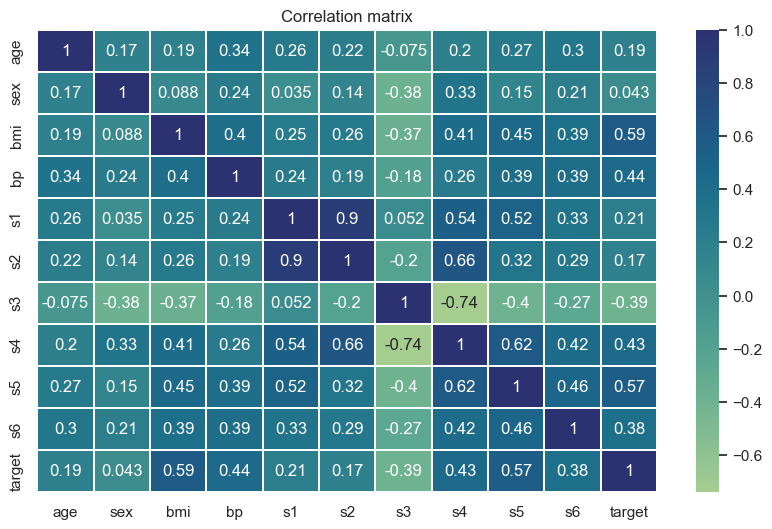

In [57]:
fig, axes = plt.subplots(1,1, figsize=(10,6))

heatmap = sns.heatmap(diabetes_df.corr(), annot=True,cmap='crest', linewidths=0.3)
heatmap.set_title("Correlation matrix")

* Correlations with disease progression in diabetes patients :
- BMI: It shows a positive correlation with diabetes progression, suggesting that higher BMI values are associated with an increased risk of diabetes progression.
- Blood Pressure (BP): There's a positive correlation between blood pressure and diabetes progression, indicating that elevated blood pressure levels may contribute to the advancement of diabetes.
- s3: This feature exhibits a negative correlation with diabetes progression, implying that higher values of s3 may be associated with a decreased risk or slower progression of diabetes.
- s4: It demonstrates a positive correlation with diabetes progression, indicating that higher levels of s4 are linked to a higher likelihood of diabetes progression.
- s5: Shows a positive correlation with diabetes progression, suggesting that higher values of s5 may indicate an increased risk of diabetes progression.

* Other Correlations:
- 's2' has a high positive correlation with 's1' and 's4': This indicates that increases in the values of 's1' and 's4' are likely to be accompanied by increases in 's2', suggesting interrelatedness among these variables.
- 's3' and 's4' are highly negatively correlated: As 's3' increases, 's4' tends to decrease, and vice versa. This negative correlation denotes an inverse relationship between these two variables in the context of diabetes progression.


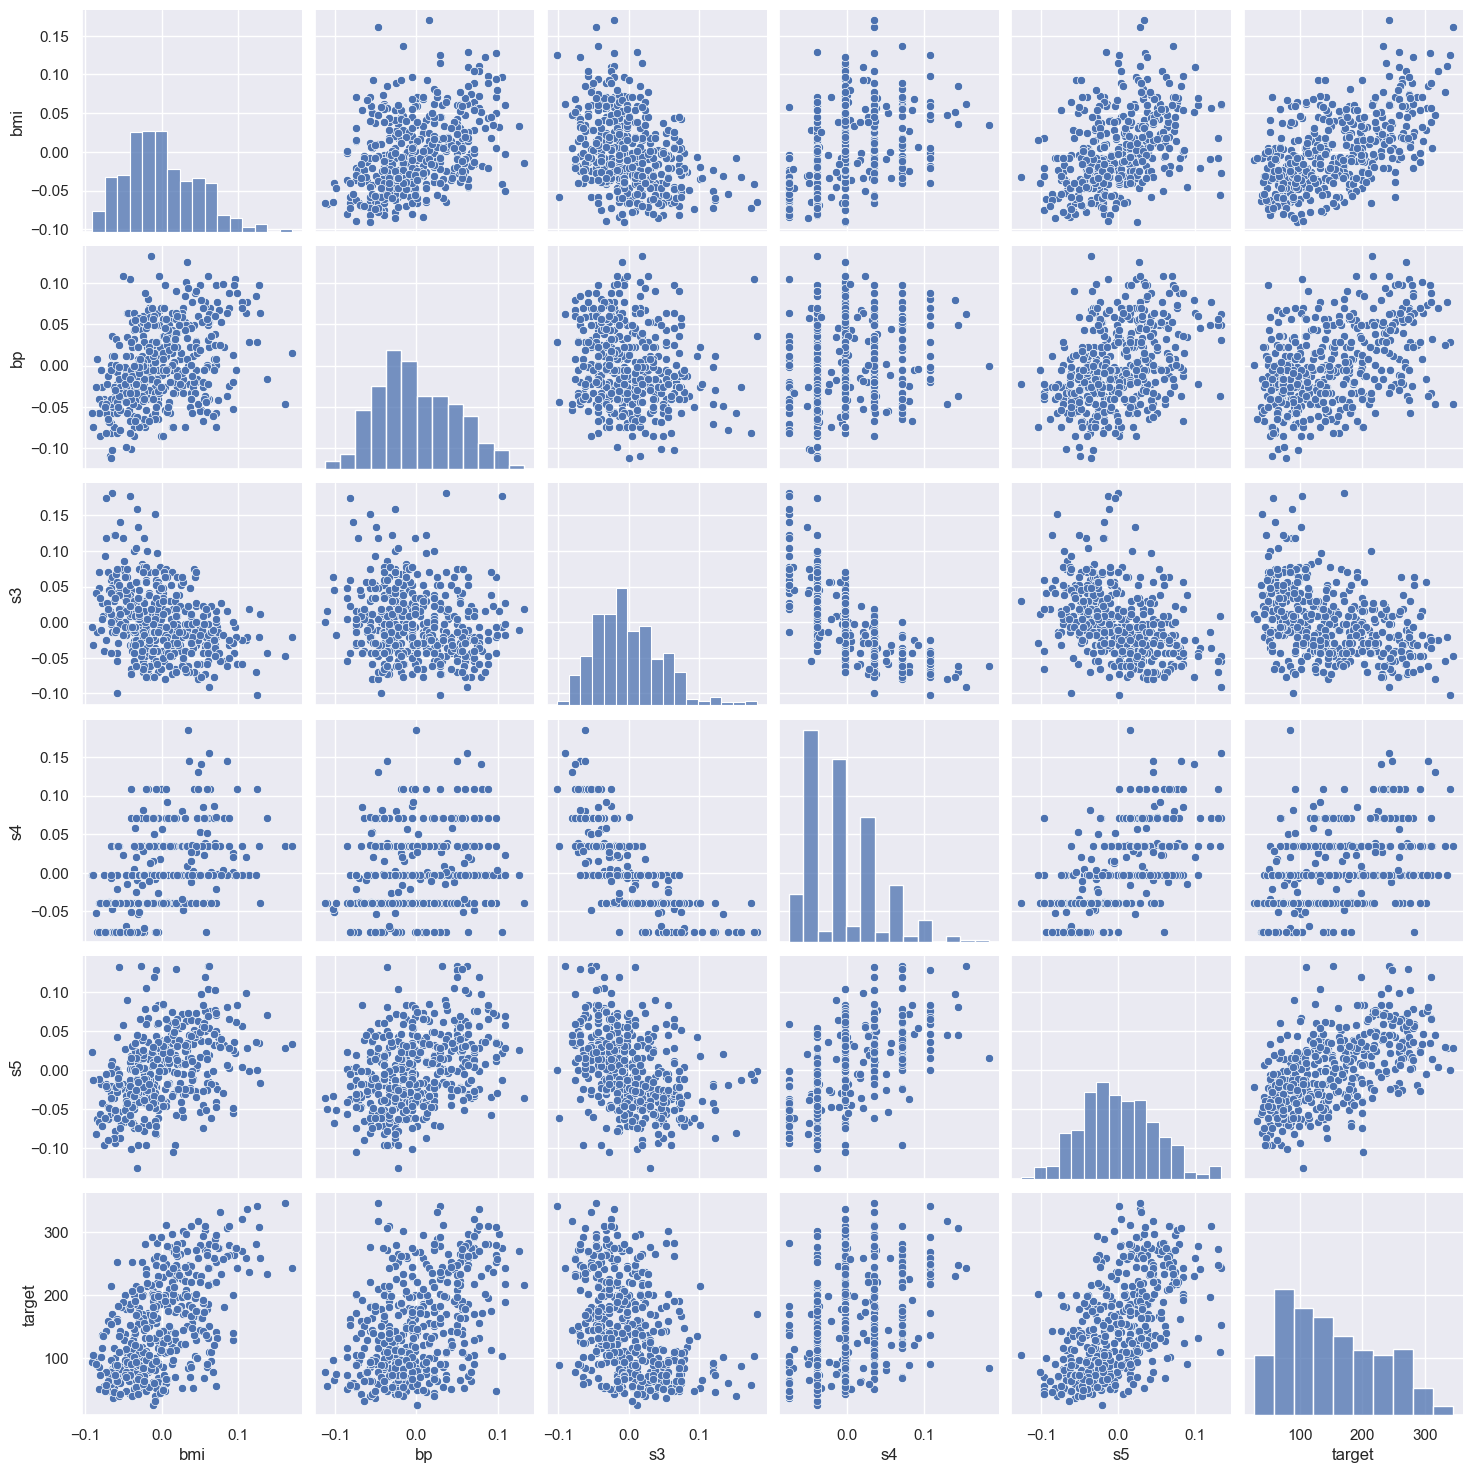

In [58]:
diabetes_df.drop(["age", "sex", "s1", "s2", "s6"], axis=1, inplace=True)
sns.pairplot(data=diabetes_df)

### **Splitting the data**

Now data needs to be split into training(85%), and test(15%) dataset.

In [59]:
# splitting the `diabetes_df` dataframe into two separate dataframes, `df_train` and `df_test`.
df_train, df_test  = train_test_split(diabetes_df,test_size=0.15,random_state=100)

X_train = df_train[["bmi", "bp", "s3", "s4", "s5"]]
y_train = df_train[["target"]]

X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1:]
X_test

,bmi,bp,s3,s4,s5
419,-0.05471,-0.05387,0.01182,-0.03949,-0.07409
406,-0.08057,-0.08486,0.03391,-0.03949,-0.05615
346,0.01751,0.03220,-0.02131,0.07121,0.06258
171,-0.04609,-0.09863,-0.01763,-0.03949,-0.05140
127,-0.00189,-0.01256,0.07809,-0.03949,0.00455
...,...,...,...,...,...
7,-0.00189,0.06663,0.02287,0.01770,-0.03582
205,0.04661,0.01499,0.00078,-0.00259,0.06345
124,0.02397,0.00810,0.02287,-0.03949,-0.01600
355,-0.00944,0.01499,-0.01395,-0.00259,-0.03325


### **Plynomial Regression**

Creating multivariate polynomial regression models with five independent variables(bmi, bp, s3, s4, s5) and one dependent variable("target). Degrees for these models range from 1 to 5.

In [60]:
polynomial_models =[]
    
def fit_polynomial_model(degree):
    return Pipeline([('polynomial', PolynomialFeatures(degree=degree)), 
                  ('linear', LinearRegression())])

for degree in range(1,6):
    model = fit_polynomial_model(degree=degree)
    model.fit(X_train, y_train)
    polynomial_models.append({"degree":degree, "model":model})


In [61]:
for index, model in enumerate(polynomial_models):
    y_prediction = model["model"].predict(X_test)

### **Decision Trees**

Creating decision trees model with five independent variables(bmi, bp, s3, s4, s5) and one dependent variable("target). Depth for these trees varies from 11 to 15.

In [62]:
decision_trees = []

def fit_decision_tree(max_depth):
    classifier = DecisionTreeClassifier(max_depth=max_depth)
    classifier.fit(X_train, y_train)
    return classifier
    
for depth in range(11,16):
    classifier = fit_decision_tree(depth)
    decision_trees.append({"depth":depth ,"classifier":classifier})

In [63]:
for index, model in enumerate(decision_trees):
    y_prediction = model["classifier"].predict(X_test)

## **kNNs**
Training  a k-Nearest Neighbors classifier on the four independent variables and one dependent variable. The value of k is range from 2 to 10 skipping one value.

In [64]:
knns = []

def fit_knn(k_value):
    classifier = KNeighborsClassifier(n_neighbors=k_value)
    classifier.fit(X_train, y_train["target"])
    return classifier

for k in range(2,11,2):
    classifier = fit_knn(k) 
    knns.append({"k_value":k ,"classifier":classifier})

In [65]:
for index, model in enumerate(knns):
    y_prediction = model["classifier"].predict(X_test)

## **Cross Validation**

Performing cross-validation to evaluate each model with different value to measure the performance of models and select appropriate one.

In [66]:
validation_stats = {
    "model":[],
    "r2_mean":[],
    "r2_std":[],
    "MAE_mean":[],
    "MAE_std":[],
    "MAPE_mean":[],
    "MAPE_std":[],
}

scoring = {
    'r2': 'r2',
    'neg_mean_absolute_error': 'neg_mean_absolute_error', 
    'neg_mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error', 
}

# Polynomial
for index, model in enumerate(polynomial_models):
    cv = cross_validate(model["model"], X_train, y_train,scoring=scoring, cv=5, return_train_score=True)
    validation_stats["model"].append(f'Polynomial Degree: {model["degree"]}')
    validation_stats["r2_mean"].append(cv["train_r2"].mean())
    validation_stats["r2_std"].append(cv["train_r2"].std())
    validation_stats["MAE_mean"].append(-cv["train_neg_mean_absolute_error"].mean())
    validation_stats["MAE_std"].append(cv["train_neg_mean_absolute_error"].std())
    validation_stats["MAPE_mean"].append(-cv["train_neg_mean_absolute_percentage_error"].mean())
    validation_stats["MAPE_std"].append(cv["train_neg_mean_absolute_percentage_error"].std()) 
    
df_stats = pd.DataFrame(validation_stats)
df_stats.style.highlight_min(color="red").highlight_max(color="green")


,model,r2_mean,r2_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std
0,Polynomial Degree: 1,0.499258,0.012410,44.496563,0.717051,0.394284,0.008469
1,Polynomial Degree: 2,0.524431,0.009043,43.542747,0.567361,0.383664,0.008036
2,Polynomial Degree: 3,0.483743,0.226438,43.619527,9.252120,0.392097,0.091065
3,Polynomial Degree: 4,0.659331,0.041284,35.743667,2.019705,0.328125,0.025007
4,Polynomial Degree: 5,0.018277,0.965734,51.165333,31.273567,0.451814,0.275462


As polynomial model with degree 3 depicts highest r2 value and low mean absolute error from above five models, it is the best model to predict the diseasis progression in diabetes patients considering bmi, bloodpressure, high-density lipoproteins, cholesterol and serum triglycerides level.

In [67]:
validation_stats = {
    "model":[],
    "r2_mean":[],
    "r2_std":[],
    "MAE_mean":[],
    "MAE_std":[],
    "MAPE_mean":[],
    "MAPE_std":[],
}

# Decision Trees
for index, model in enumerate(decision_trees):
    cv = cross_validate(model["classifier"], X_train, y_train,scoring=scoring, cv=5, return_train_score=True)
    validation_stats["model"].append(f'Decision Tree (Depth: {model["depth"]})')
    validation_stats["r2_mean"].append(cv["train_r2"].mean())
    validation_stats["r2_std"].append(cv["train_r2"].std())
    validation_stats["MAE_mean"].append(-cv["train_neg_mean_absolute_error"].mean())
    validation_stats["MAE_std"].append(cv["train_neg_mean_absolute_error"].std())
    validation_stats["MAPE_mean"].append(-cv["train_neg_mean_absolute_percentage_error"].mean())
    validation_stats["MAPE_std"].append(cv["train_neg_mean_absolute_percentage_error"].std())

df_stats = pd.DataFrame(validation_stats)
df_stats.style.highlight_min(color="red").highlight_max(color="green")

,model,r2_mean,r2_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std
0,Decision Tree (Depth: 11),0.491748,0.155655,22.408000,5.307201,0.125701,0.023437
1,Decision Tree (Depth: 12),0.620358,0.097114,16.978667,4.058003,0.094615,0.019091
2,Decision Tree (Depth: 13),0.711302,0.134714,12.596667,4.571794,0.067700,0.022115
3,Decision Tree (Depth: 14),0.766932,0.081936,9.982000,3.806648,0.052958,0.024072
4,Decision Tree (Depth: 15),0.798341,0.121999,8.328667,4.456757,0.044441,0.022143


As decision tree with depth 15 depicts highest r2 value and lowest mean absolute error and standard deviation from above five models, it is the best model to predict the diseasis progression in diabetes patients considering bmi, bloodpressure, high-density lipoproteins, cholesterol and serum triglycerides level.

From the above metrics table, it can be seen that as depth of tree increases, the value of r2 is also goes high and mean absolute error is declining.

In [68]:
validation_stats = {
    "model":[],
    "r2_mean":[],
    "r2_std":[],
    "MAE_mean":[],
    "MAE_std":[],
    "MAPE_mean":[],
    "MAPE_std":[],
}


# kNN
for index, model in enumerate(knns):
    cv = cross_validate(model["classifier"], X_train, y_train,scoring=scoring, cv=5, return_train_score=True)
    validation_stats["model"].append(f'kNN (K: {model["k_value"]})')
    validation_stats["r2_mean"].append(cv["train_r2"].mean())
    validation_stats["r2_std"].append(cv["train_r2"].std())
    validation_stats["MAE_mean"].append(-cv["train_neg_mean_absolute_error"].mean())
    validation_stats["MAE_std"].append(cv["train_neg_mean_absolute_error"].std())
    validation_stats["MAPE_mean"].append(-cv["train_neg_mean_absolute_percentage_error"].mean())
    validation_stats["MAPE_std"].append(cv["train_neg_mean_absolute_percentage_error"].std())
    
df_stats = pd.DataFrame(validation_stats)
df_stats.style.highlight_min(color="red").highlight_max(color="green")

,model,r2_mean,r2_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std
0,kNN (K: 2),0.467462,0.045875,31.156000,1.594269,0.168223,0.008103
1,kNN (K: 4),0.028167,0.054978,52.694000,1.887872,0.297045,0.010833
2,kNN (K: 6),-0.219390,0.030003,62.748000,0.829022,0.364460,0.005763
3,kNN (K: 8),-0.357875,0.041291,68.088667,1.348824,0.401597,0.009347
4,kNN (K: 10),-0.425870,0.038774,69.980000,1.249556,0.418481,0.009619


The kNN classifier with k value 2 is the best model from above five kNN classifier because it can be seen that as value of k increases the r2 value is getting decline and mean absolue value is inclining.

## **Choosing best-fit model**

**Decision tree with depth value of 15** is the best-fit model from above all model as it scored the highest r2 value 0.830295 and least mean absolute error 7.707333.

R-Squared: -0.2931499540971343,
MAE: 67.07462686567165,
MAPE: 0.6116810581180575


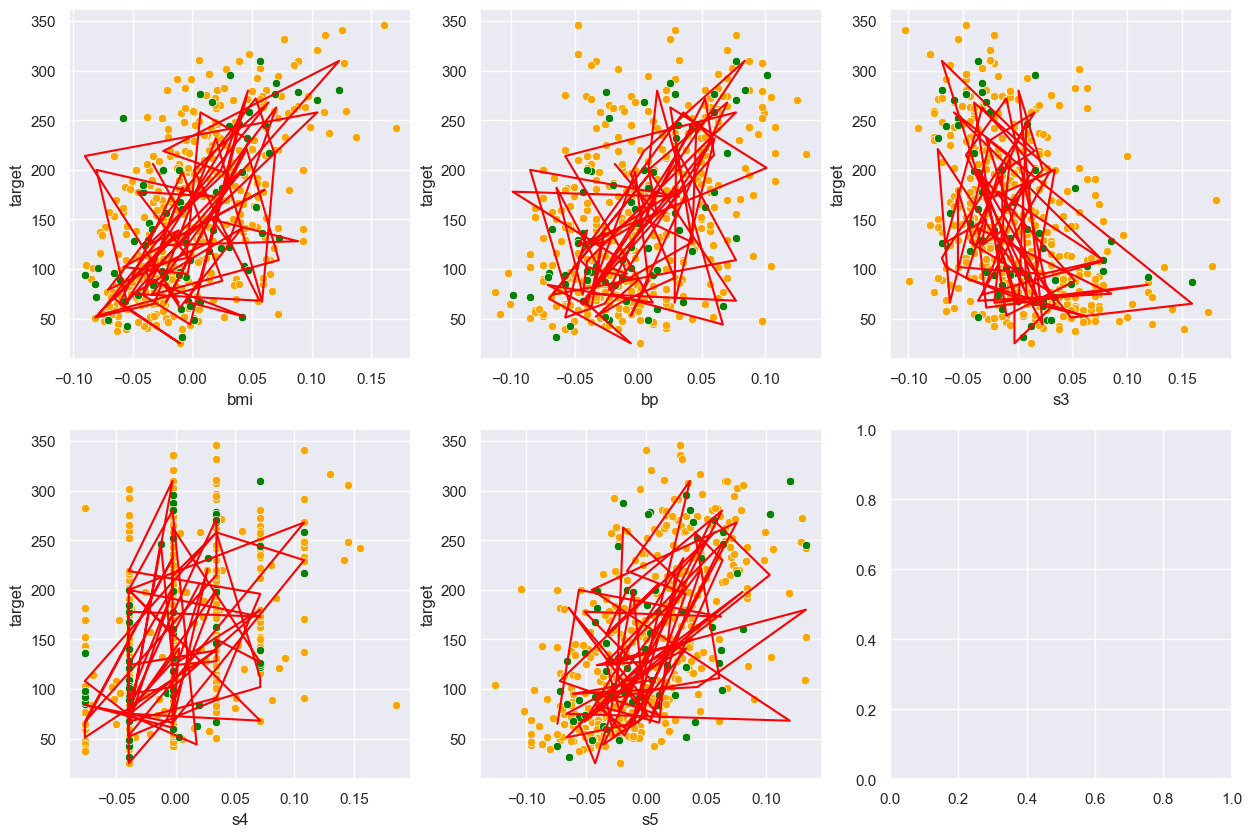

In [79]:
classifier = decision_trees[-1]["classifier"]
y_prediction = classifier.predict(X_test)


r2_test = r2_score(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
mape = mean_absolute_percentage_error(y_test, y_prediction)

print(f"R-Squared: {r2_test},\nMAE: {mae},\nMAPE: {mape}")

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.scatterplot(data=df_train, x="bmi", y="target", c="orange",ax=axis[0,0])
sns.scatterplot(data=df_test, x="bmi", y="target", c="green",ax=axis[0,0])
axis[0,0].plot(X_test[["bmi"]], y_prediction, color="red")

sns.scatterplot(data=df_train, x="bp", y="target", c="orange",ax=axis[0,1])
sns.scatterplot(data=df_test, x="bp", y="target", c="green",ax=axis[0,1])
axis[0,1].plot(X_test[["bp"]], y_prediction, color="red")

sns.scatterplot(data=df_train, x="s3", y="target", c="orange",ax=axis[0,2])
sns.scatterplot(data=df_test, x="s3", y="target", c="green",ax=axis[0,2])
axis[0,2].plot(X_test[["s3"]], y_prediction, color="red")

sns.scatterplot(data=df_train, x="s4", y="target", c="orange",ax=axis[1,0])
sns.scatterplot(data=df_test, x="s4", y="target", c="green",ax=axis[1,0])
axis[1,0].plot(X_test[["s4"]], y_prediction, color="red")

sns.scatterplot(data=df_train, x="s5", y="target", c="orange",ax=axis[1,1])
sns.scatterplot(data=df_test, x="s5", y="target", c="green",ax=axis[1,1])
axis[1,1].plot(X_test[["s5"]], y_prediction, color="red")

## **Conclusion**

Based on the evaluation of decision tree regression models with varying depths on the scikit-learn diabetes dataset, we observed promising performance during the training phase, with increasing depths generally resulting in improved predictive accuracy and model fit. However, when tested on the validation set, the models exhibited suboptimal performance, characterized by a negative R-squared value and elevated mean absolute error (MAE) and mean absolute percentage error (MAPE) values. These findings suggest potential challenges with overfitting.